# Digit Recognizer

https://www.kaggle.com/c/digit-recognizer/data

# 1. Introduction






<img src="https://lh3.googleusercontent.com/HDZ707iPX3BBQ5I03kgGXYe6HNOuQj26VSfIR5uA88LOCo2P-YEpnZbGcUcX3JR4IDQaEVBO6uQIn6Rfsp5eDecCpVI0bvNqlsqEmzrMNELYBDCpNsUPsaTDL357RwghaeOh-yCL" ></img>

# 1. Deep learning neural networks





<img src="https://www.researchgate.net/profile/Luigi_Celona2/publication/328509150/figure/fig1/AS:685633529982984@1540479180454/Ball-chart-reporting-the-Top-1-and-Top-5-accuracy-vs-computational-complexity-Top-1-and.ppm" ></img>

### Computer vision vs Machine learning


<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/Computer-Vision.png" ></img>

In [3]:
from sklearn import datasets, svm, metrics

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
###
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
###
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

sns.set(style='white', context='notebook', palette='deep')

# 2. Data preparation
## 2.1 Load data

In [5]:
# Load the data
#WARNING! Working locally please do not forget to specify the correct path to data

PATH_TO_TRAIN = '<dataset/ML_Weekly/8/train.csv>'
PATH_TO_TEST = '<dataset/ML_Weekly/8/test.csv>'
train = pd.read_csv(PATH_TO_TRAIN)
test = pd.read_csv(PATH_TO_TEST)

In [6]:
df_x=train.iloc[:,1:]

In [7]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp )

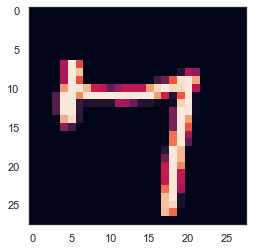

In [8]:
print_image(120, df_x)
# print target

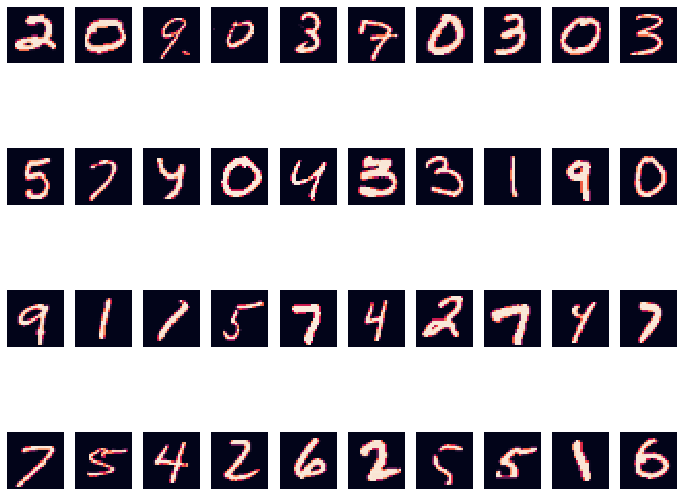

In [9]:
# delete coordinates





plt.figure(figsize=(12,10))
#range 3, 10, 30
for i in range(40):
    plt.subplot(4, 10, i+1)
    plt.axis('off')
    print_image(i, test)

In [10]:
train.head(3)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  

[3 rows x 785 columns]

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


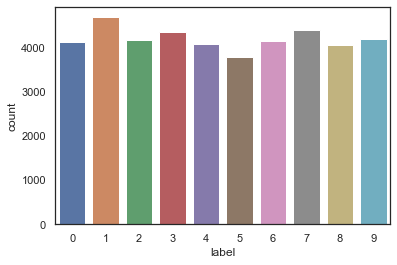

In [12]:
#check if class is balnced 
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 
#check if class is balnced 
Y_test = test




data_balance = sns.countplot(Y_train)


In [13]:
X_train.head(5)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

## 2.2 Check for null and missing values

In [14]:
# Check the data
X_train.isnull().values.sum()

0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [16]:
#training random Forest
rf=RandomForestClassifier(n_estimators=100, n_jobs = -1,random_state=42)
rf.fit(X_train,y_train)
#n_jobs(-1 для максимального кол потоков.)
#random state например 42

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [17]:
pred=rf.predict(X_test)

print(classification_report(y_test, pred))

#print(confusion_matrix(y_test, pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       813
           1       0.99      0.99      0.99       961
           2       0.96      0.97      0.97       860
           3       0.96      0.95      0.95       863
           4       0.97      0.96      0.96       827
           5       0.96      0.97      0.96       756
           6       0.96      0.98      0.97       841
           7       0.97      0.96      0.97       899
           8       0.95      0.95      0.95       768
           9       0.95      0.93      0.94       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



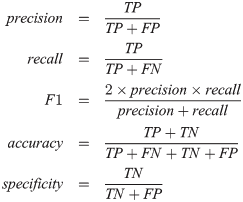

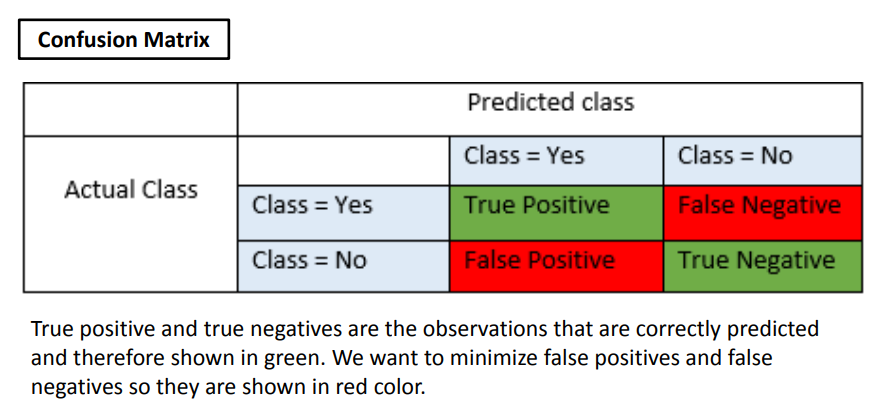

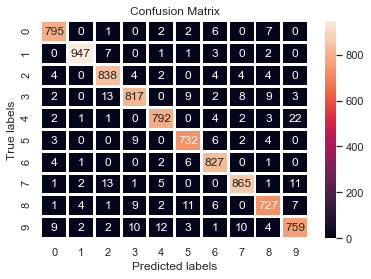

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
cm =confusion_matrix(y_test, pred)  
sns.set(rc={'figure.figsize':(11.7,8.27)})

#fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cm, annot=True, ax = ax, linewidths=1.9, fmt='g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
